In [ ]:
!mkdir ~/.kaggle

In [ ]:
!echo '{"username":"krishikatenguria","key":"47196eb4cce8e74020e5c225841d6edd"}' > ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets list -s self-driving-car-dataset

ref                                                             title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sshikamaru/udacity-self-driving-car-dataset                     Udacity Self Driving Car Dataset                    1GB  2022-07-02 03:36:04            543         46  0.875            
kumaresanmanickavelu/lyft-udacity-challenge                     Semantic Segmentation for Self Driving Cars         5GB  2018-05-18 05:59:42           5329        116  0.75             
alincijov/self-driving-cars                                     Self-Driving Cars                                 892MB  2021-12-08 14:50:47           2040         46  0.7058824        
andy8744/udacity-self-driving-car-behavioural-cloning           Udacit

In [ ]:
!kaggle datasets download -d imprime/selfdriving-car-dataset

100% 296M/297M [00:02<00:00, 122MB/s]
100% 297M/297M [00:02<00:00, 109MB/s]


In [ ]:
!unzip /content/selfdriving-car-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data-master/IMG/right_2018_10_17_16_41_01_193.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_01_325.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_01_456.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_01_558.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_01_679.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_01_802.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_01_897.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_02_035.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_02_151.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_02_275.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_02_390.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_02_512.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_02_632.jpg  
  inflating: data-master/IMG/right_2018_10_17_16_41_02_742.jpg  
  inflating: data-master/IMG/right_2018

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.image as mpimg

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,Dense,MaxPooling2D,Dropout,Flatten
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import ntpath

In [ ]:
datadir = '/content/data-master'

In [ ]:
columns = ['center','left','right','steering','throttle','reverse','speed']

In [ ]:
dataset = pd.read_csv(os.path.join(datadir,'/content/data-master/driving_log.csv'),names=columns)

In [ ]:
os.path.join(datadir,'/content/data-master/driving_log.csv')

'/content/data-master/driving_log.csv'

In [ ]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
1,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
2,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079
3,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
4,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079


In [ ]:
def removePath(path):
  base,tail = ntpath.split(path)
  return tail

In [ ]:
dataset['center'] = dataset['center'].apply(removePath)

In [ ]:
dataset['left'] = dataset['left'].apply(removePath)

In [ ]:
dataset['right'] = dataset['right'].apply(removePath)

In [ ]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_10_17_16_36_30_865.jpg,left_2018_10_17_16_36_30_865.jpg,right_2018_10_17_16_36_30_865.jpg,0.0,0.0,0.0,0.000078
1,center_2018_10_17_16_36_30_966.jpg,left_2018_10_17_16_36_30_966.jpg,right_2018_10_17_16_36_30_966.jpg,0.0,0.0,0.0,0.000078
2,center_2018_10_17_16_36_31_098.jpg,left_2018_10_17_16_36_31_098.jpg,right_2018_10_17_16_36_31_098.jpg,0.0,0.0,0.0,0.000079
3,center_2018_10_17_16_36_31_253.jpg,left_2018_10_17_16_36_31_253.jpg,right_2018_10_17_16_36_31_253.jpg,0.0,0.0,0.0,0.000078
4,center_2018_10_17_16_36_31_366.jpg,left_2018_10_17_16_36_31_366.jpg,right_2018_10_17_16_36_31_366.jpg,0.0,0.0,0.0,0.000079


In [ ]:
num_bins = 25

In [ ]:
hist,bins = np.histogram(dataset['steering'],num_bins)

In [ ]:
print(hist)
print(bins)

[  48   16   13   15   21   36   48   69  161  174  337  239 5454   56
  160   82   97   99   37   25   32   15   12    5    8]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [ ]:
center = (bins[:-1]+bins[1:])*0.5

In [ ]:
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

In [ ]:
center1 = []
for i in range(0,len(bins)-1):
  x = (bins[i] + bins[i+1]) * 0.5
  center1.append(x)

In [ ]:
center1

[-0.96,
 -0.88,
 -0.8,
 -0.72,
 -0.6399999999999999,
 -0.56,
 -0.48,
 -0.39999999999999997,
 -0.32,
 -0.24,
 -0.15999999999999998,
 -0.08000000000000002,
 0.0,
 0.08000000000000007,
 0.16000000000000003,
 0.24,
 0.32000000000000006,
 0.4,
 0.48,
 0.56,
 0.64,
 0.72,
 0.8,
 0.88,
 0.96]

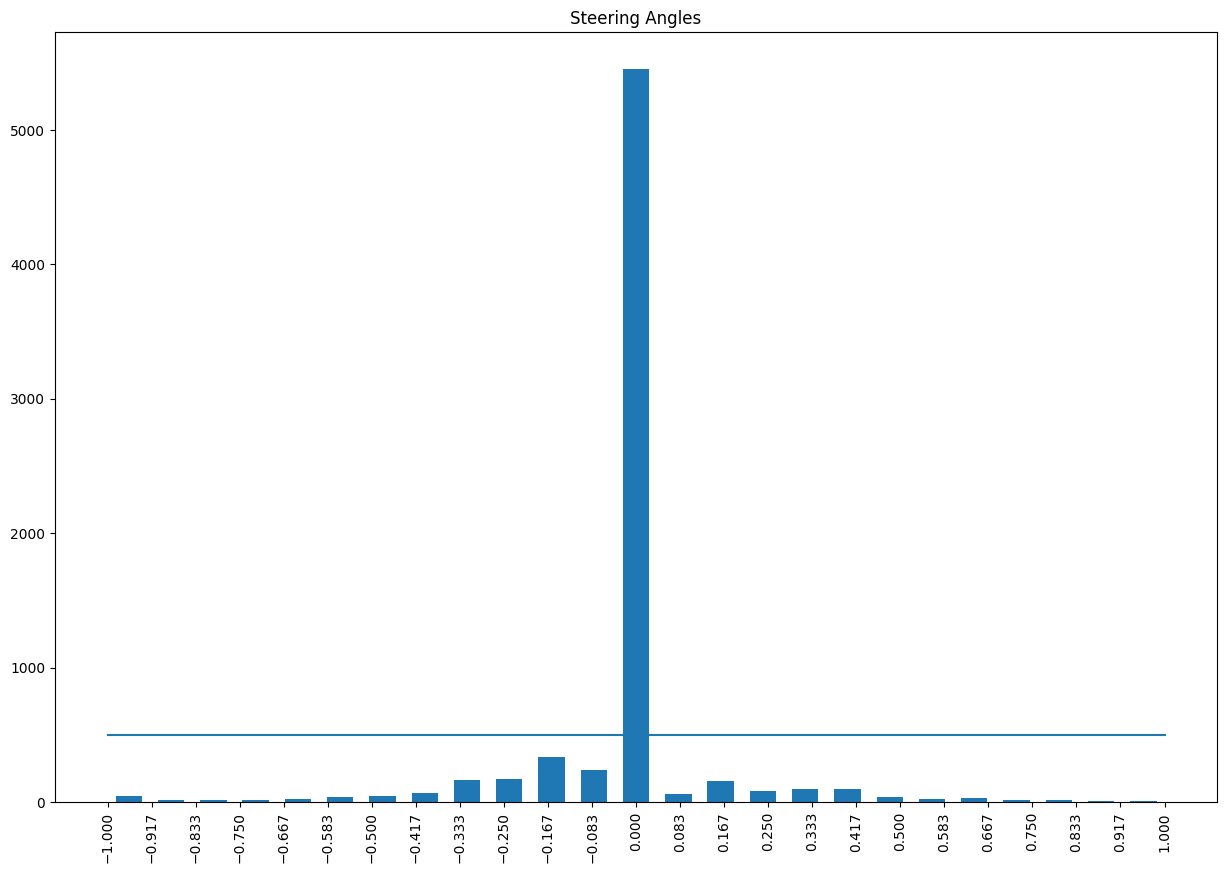

In [ ]:
threshold = 500
plt.figure(figsize=(15,10))
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [ ]:
remove_list = []
for i in range(num_bins):
  List = []
  for j in range(len(dataset['steering'])):
    if dataset['steering'][j] >= bins[i] and dataset['steering'][j] <= bins[i+1]:
      List.append(j)
  List = shuffle(List)
  List = List[threshold:]
  remove_list.extend(List)

In [ ]:
len(dataset['steering'])

7259

In [ ]:
len(remove_list)

4954

In [ ]:
dataset.drop(dataset.index[remove_list],inplace=True)

In [ ]:
hist,_ = np.histogram(dataset['steering'],num_bins)

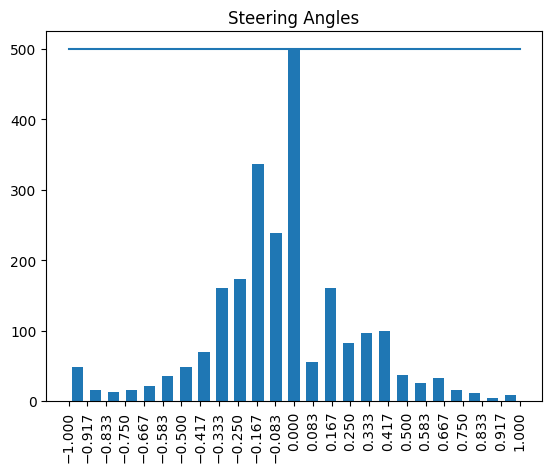

In [ ]:
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [ ]:
dataset.iloc[1]

center      center_2018_10_17_16_36_31_253.jpg
left          left_2018_10_17_16_36_31_253.jpg
right        right_2018_10_17_16_36_31_253.jpg
steering                                   0.0
throttle                                   0.0
reverse                                    0.0
speed                                 0.000078
Name: 3, dtype: object

In [ ]:
datadir

'/content/data-master'

In [ ]:
def loadImageSteering(datadir,dataset):
  imagePath = []
  steeringPath = []
  for i in range(len(dataset)):
    center = dataset.iloc[i][0]
    steering = float(dataset.iloc[i][3])
    imagePath.append(os.path.join(datadir,center))
    steeringPath.append(steering)
  imagePath = np.asarray(imagePath)
  steeringPath = np.asarray(steeringPath)
  return imagePath,steeringPath

In [ ]:
dataset.iloc[0][0]

'center_2018_10_17_16_36_31_098.jpg'

In [ ]:
imagePath,steeringPath = loadImageSteering(datadir+'/IMG',dataset)

In [ ]:
imagePath[0]

'/content/data-master/IMG/center_2018_10_17_16_36_31_098.jpg'

In [ ]:
len(steeringPath)

2305

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(imagePath,steeringPath,random_state=6,test_size=0.2)

In [ ]:
len(x_train)

1844

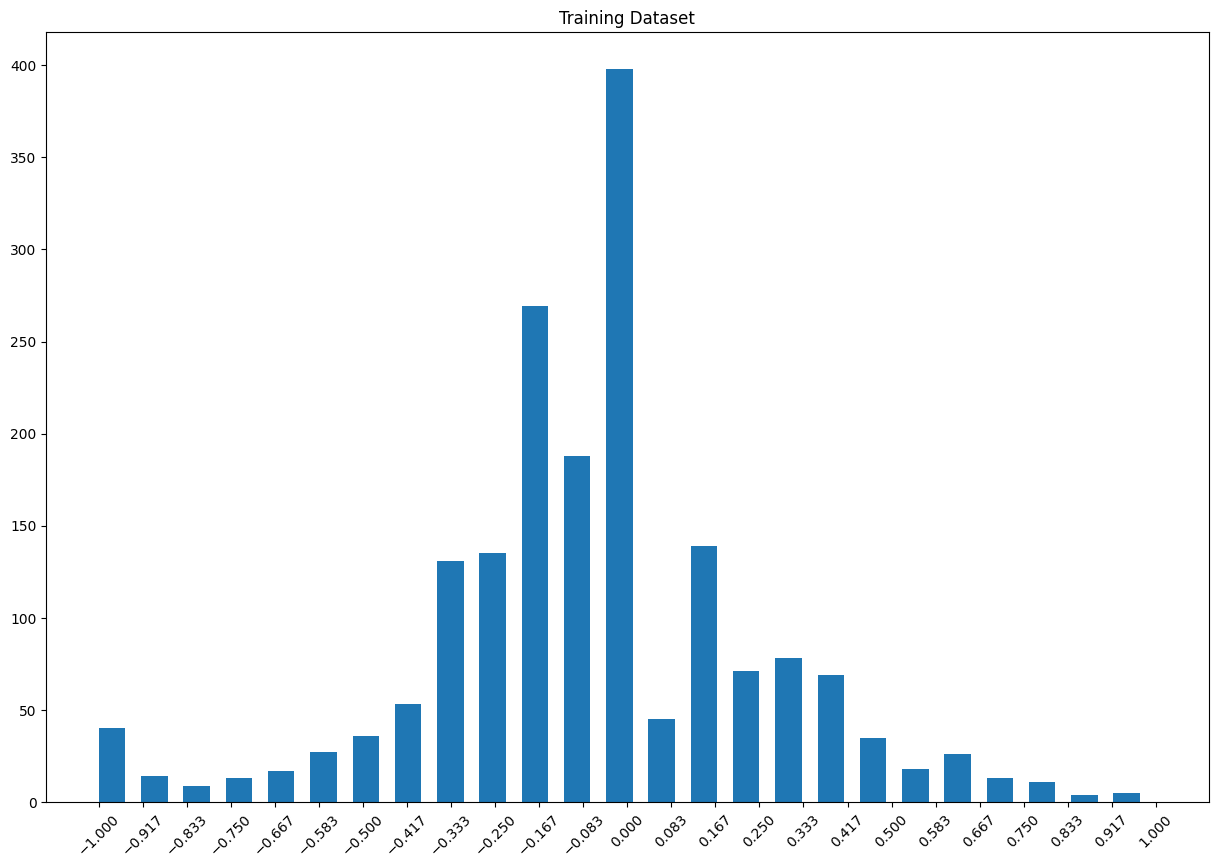

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(y_train,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Training Dataset")
plt.show()


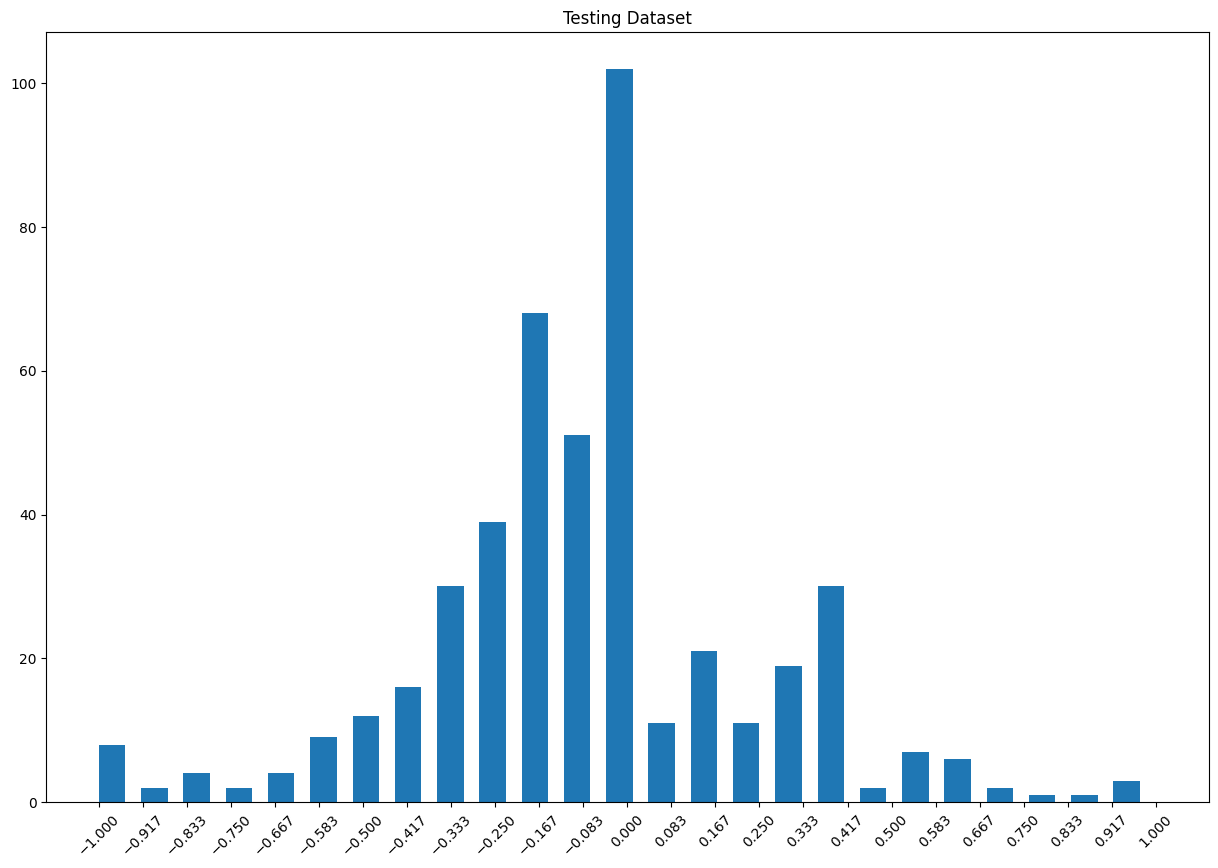

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(y_test,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Testing Dataset")
plt.show()

In [ ]:
def imagePreprocessing(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

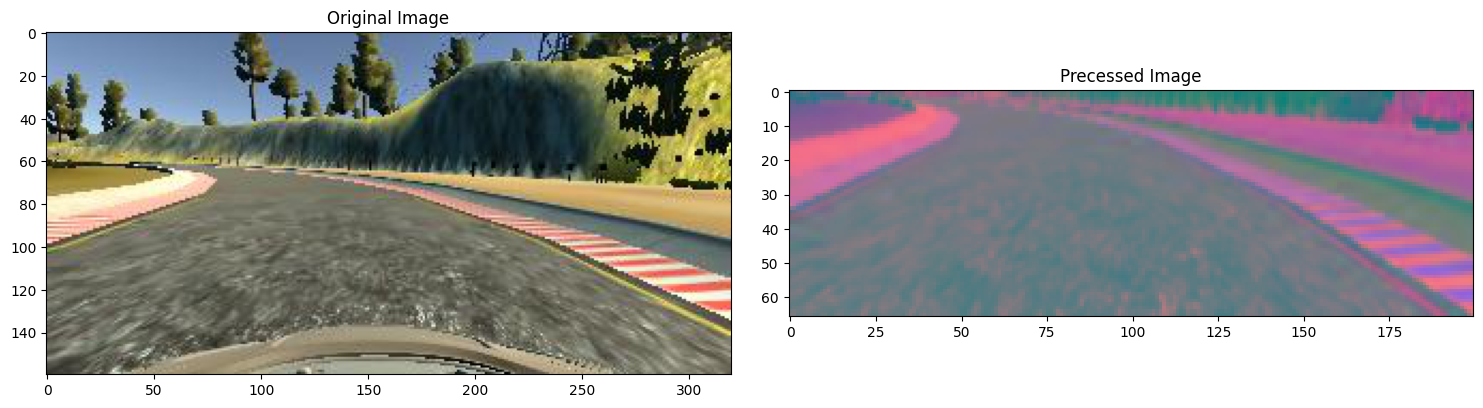

In [ ]:
image = imagePath[1]
image = mpimg.imread(image)
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].grid(False)
axs[0].set_title("Original Image")
axs[1].imshow(imagePreprocessing(imagePath[1]))
axs[1].grid(False)
axs[1].set_title("Precessed Image")
plt.show()

In [ ]:
x_train = np.array(list(map(imagePreprocessing,x_train)))

In [ ]:
x_test = np.array(list(map(imagePreprocessing,x_test)))

In [ ]:
# from google.colab import files

In [ ]:
#upload = files.upload()

In [ ]:
# img = plt.imread('nvidia architectue.png')

In [ ]:
# plt.figure(figsize=(15,50))
# plt.imshow(img)
# plt.title("NVIDIA Architecture")

In [ ]:
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))

  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))

  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")

  return model

In [ ]:
model = nvidiaModel()

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [ ]:
h = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=100,shuffle=1,verbose=1)

Epoch 1/30
19/19 [==============================] - 18s 868ms/step - loss: 0.5614 - val_loss: 0.1596
Epoch 2/30
19/19 [==============================] - 19s 1s/step - loss: 0.1661 - val_loss: 0.0939
Epoch 3/30
19/19 [==============================] - 17s 873ms/step - loss: 0.1163 - val_loss: 0.0909
Epoch 4/30
19/19 [==============================] - 17s 909ms/step - loss: 0.1082 - val_loss: 0.0861
Epoch 5/30
19/19 [==============================] - 18s 954ms/step - loss: 0.1079 - val_loss: 0.0840
Epoch 6/30
19/19 [==============================] - 17s 890ms/step - loss: 0.1024 - val_loss: 0.0827
Epoch 7/30
19/19 [==============================] - 16s 854ms/step - loss: 0.0951 - val_loss: 0.0893
Epoch 8/30
19/19 [==============================] - 17s 890ms/step - loss: 0.0946 - val_loss: 0.0803
Epoch 9/30
19/19 [==============================] - 18s 944ms/step - loss: 0.0950 - val_loss: 0.0761
Epoch 10/30
19/19 [==============================] - 16s 852ms/step - loss: 0.0892 - val_loss:

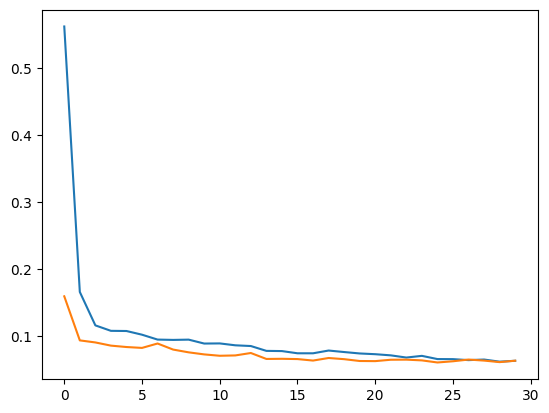

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [ ]:
model.save('car.h5')

In [ ]:
# from google.colab import files
# files.download('car.h5')

In [ ]:
type('car.h5')

str